In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from scipy.signal import butter, lfilter
from scipy.io import loadmat
import pandas as pd
from sklearn.model_selection  import train_test_split
from mne.decoding import CSP
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
import pywt

# View Data

In [ ]:
mat  = loadmat("/content/A03E.mat")

In [ ]:
mat['data'][0][3][0].shape

(1,)

In [ ]:
pd.DataFrame(mat['data'][0][3][0])

,X,trial,y,fs,classes,artifacts,gender,age
0,"[[-8.984375, -14.55078125, -10.15625, -11.8652...","[[251], [2254], [4172], [6124], [8132], [10243...","[[1], [2], [2], [1], [2], [1], [2], [3], [2], ...",[[250]],"[[[left hand], [right hand], [feet], [tongue]]]","[[0], [0], [1], [0], [0], [0], [0], [0], [0], ...",[male],[[26]]


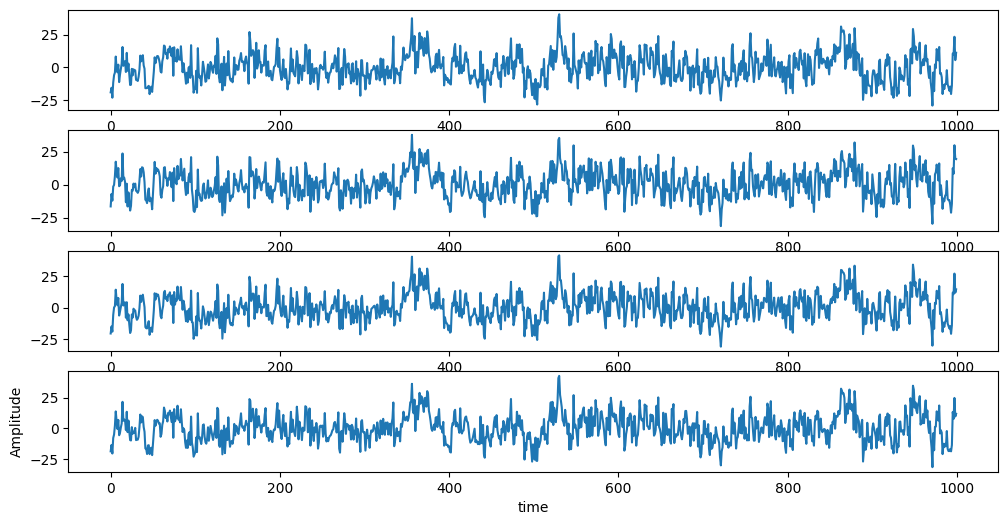

In [ ]:
dataset = mat['data']
samples = dataset[0][3][0][0][0] 
trials  = dataset[0][3][0][0][1]

x = samples[trials[0,0]:trials[1,0]]
x = x[500: 1500, 0: -3].T
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(x[0])
plt.subplot(412)
plt.plot(x[1])
plt.subplot(413)
plt.plot(x[2])
plt.subplot(414)
plt.plot(x[3])
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.show()

        

In [ ]:
pd.DataFrame(mat['data'][0][3][0][0][0]) # signals

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-8.984375,-14.550781,-10.156250,-11.865234,-9.130859,-7.568359,-10.498047,-11.474609,-9.863281,-10.791016,...,-8.935547,-8.349609,-2.636719,-10.253906,-9.423828,-4.931641,-7.470703,-11.230469,-5.371094,-1.464844
1,-5.566406,-10.107422,-9.130859,-7.275391,-6.884766,-3.222656,-6.591797,-7.470703,-9.277344,-7.324219,...,-7.714844,-6.542969,-0.878906,-11.279297,-9.716797,-3.955078,-8.349609,-3.906250,-0.976562,1.953125
2,10.351562,4.003906,6.445312,7.910156,8.984375,11.425781,5.566406,5.615234,8.203125,7.812500,...,7.031250,9.619141,15.869141,7.470703,8.935547,14.355469,11.279297,16.113281,14.648438,15.136719
3,-2.587891,-7.910156,-4.736328,-6.250000,-4.101562,-5.029297,-4.296875,-6.738281,-3.369141,-6.347656,...,-6.298828,-4.736328,0.048828,-5.908203,-5.664062,-1.074219,-4.052734,-8.300781,0.000000,-2.929688
4,-2.587891,-4.833984,-4.931641,-5.566406,-6.494141,-2.685547,-5.664062,-5.322266,-6.298828,-5.322266,...,-7.666016,-6.347656,-1.074219,-8.740234,-10.009766,-3.613281,-7.714844,0.488281,1.464844,3.417969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96730,3.466797,2.343750,-0.097656,2.929688,2.197266,4.296875,2.587891,2.294922,0.146484,1.318359,...,0.292969,-2.050781,-0.634766,-0.830078,-3.564453,-6.494141,-7.177734,-5.371094,4.394531,7.812500
96731,-3.564453,-6.787109,-6.152344,-6.396484,-3.222656,-1.855469,-8.349609,-9.277344,-6.103516,-7.519531,...,-9.179688,-9.277344,-7.031250,-7.617188,-10.888672,-13.134766,-13.476562,-17.089844,-12.207031,-7.812500
96732,-5.566406,-7.177734,-6.835938,-3.710938,-5.175781,-4.736328,-10.644531,-7.226562,-5.517578,-4.394531,...,-5.566406,-7.275391,-5.664062,-6.054688,-9.179688,-10.986328,-9.960938,-7.812500,-5.859375,-0.488281
96733,11.181641,8.984375,8.300781,10.693359,9.912109,10.937500,1.367188,5.029297,6.982422,7.373047,...,2.880859,2.734375,5.810547,0.634766,-0.292969,-2.294922,-2.978516,4.882812,13.183594,15.136719


In [ ]:
pd.DataFrame(mat['data'][0][3][0][0][1]) # trials

,0
0,251
1,2254
2,4172
3,6124
4,8132
5,10243
6,12160
7,14210
8,16141
9,18139


In [ ]:
pd.DataFrame(mat['data'][0][3][0][0][2]) # labels

,0
0,1
1,2
2,2
3,1
4,2
5,1
6,2
7,3
8,2
9,4


# Preprocessing

In [ ]:
# Band Pass Filter with low cut of 8 hz and high cut of 30 hz
# This choice is because of the fact that motor imagery features generally happen in alpha and beta band of EEG.
def butter_bandpass (lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter (signal, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, signal)
    return y


def Preprocessing(path):
    # load data
    mat  = loadmat(path)
    data = mat['data']
    
    finalResult_x = np.empty([1, 22, 1500-500]) # signals
    finalResult_y = np.empty([1])              # labels
    N  = data.shape[1]              # number of samples


    # iteration on motor imagery task sessions (left hand, right hand, feet, tongue)
    # iterative from 3 to 8 => 6 runs 
    # each run callect 48 trials
    # then 6*48 = 288 trials
    
    # The signals were obtained using 22 electrodes for EEG and 3 electrodes for EOG => 22+3 = 25 channel
    # each signal have 25 channel and number of signals is ~ 10000
    
    for j in range(3,N):
        samples = data[0][j][0][0][0] # whole signal of the session
        trials  = data[0][j][0][0][1] # indices of successive trials
        labels  = data[0][j][0][0][2] # labels of corresponding task

        # iteration on tasks in each session
        for i in range(48):
            
            # we interested on signals between trials so we store it in x variable 
            if i < 47:
                x = samples[trials[i,0]:trials[i+1,0]]
            else:
                x = samples[trials[i,0]:]
            
            # remove the last 3 channels (EOG) and transpose the matrix
            x = x[500: 1500, 0: -3].T
            
            # apply band pass filter
            
                      # x = butter_bandpass_filter(
                      #     signal  = x,
                      #     lowcut  = 8,
                      #     highcut = 30,
                      #     fs      = 250,
                      #     order   = 6
                      # )
                      
            # CAR - enhances the local activity at electrode i by subtracting the average over all electrodes
            columns = len(x)
            rows = len(x[0])
            total = 0 
            summation=0

            for k in range (columns):
                for l in range(rows):
                    summation += x[k][l]
                    total = total +1
            avg = summation/total

            for k in range (columns):
                for l in range(rows):
                    x[k][l] -= avg
                    
            # normalize
            x = (x - np.mean(x))/np.std(x)
            
            x = np.expand_dims(x, axis=0)
            y = np.array([labels[i,0]])

            finalResult_x = np.concatenate((finalResult_x, x),axis=0)
            finalResult_y = np.concatenate((finalResult_y, y),axis=0)

    return finalResult_x[1:], finalResult_y[1:] # first sample is empty
    

In [ ]:
np.arange(-11,10).shape

(21,)

In [ ]:
data, labels = Preprocessing('A03T.mat')
data_test, labels_test = Preprocessing('A03E.mat')

In [ ]:
labels

array([1., 2., 2., 1., 2., 1., 2., 3., 2., 4., 1., 3., 2., 1., 4., 4., 4.,
       4., 4., 1., 3., 2., 1., 1., 3., 4., 1., 3., 3., 3., 1., 2., 1., 2.,
       2., 1., 2., 3., 2., 3., 3., 4., 3., 3., 4., 4., 4., 4., 4., 3., 2.,
       1., 1., 2., 3., 4., 2., 3., 1., 1., 1., 4., 2., 2., 1., 1., 3., 1.,
       2., 4., 4., 3., 1., 4., 4., 2., 4., 4., 2., 1., 2., 3., 3., 3., 4.,
       3., 1., 4., 2., 3., 2., 3., 4., 2., 3., 1., 1., 1., 4., 2., 1., 3.,
       1., 3., 2., 4., 1., 3., 3., 1., 3., 2., 4., 4., 4., 3., 1., 4., 2.,
       4., 2., 1., 3., 2., 1., 3., 3., 1., 3., 4., 4., 2., 1., 2., 4., 2.,
       4., 3., 2., 2., 2., 3., 4., 1., 2., 4., 1., 3., 3., 4., 1., 1., 3.,
       2., 4., 4., 4., 2., 1., 3., 2., 4., 1., 4., 3., 2., 4., 4., 1., 2.,
       2., 3., 4., 2., 1., 1., 4., 2., 1., 3., 2., 2., 3., 1., 4., 3., 3.,
       3., 3., 1., 2., 1., 2., 1., 1., 3., 3., 2., 3., 4., 1., 4., 1., 1.,
       2., 4., 3., 2., 4., 3., 4., 3., 4., 2., 2., 4., 1., 2., 2., 2., 3.,
       4., 1., 4., 1., 3.

In [ ]:
# convert labels from list of float to list of int 
labels=[int(x) for x in labels]
labels_test=[int(x) for x in labels_test]
labels=np.array(labels)
labels_test=np.array(labels_test)

In [ ]:
np.save('Preprocessed_data/CAR/train_x_with_CAR.npy',data)
np.save('Preprocessed_data/CAR/train_y_with_CAR.npy',labels)
np.save('Preprocessed_data/CAR/test_x_with_CAR.npy',data_test)
np.save('Preprocessed_data/CAR/test_y_with_CAR.npy',labels_test)

FileNotFoundError: ignored

In [ ]:
data.shape

(288, 22, 1000)

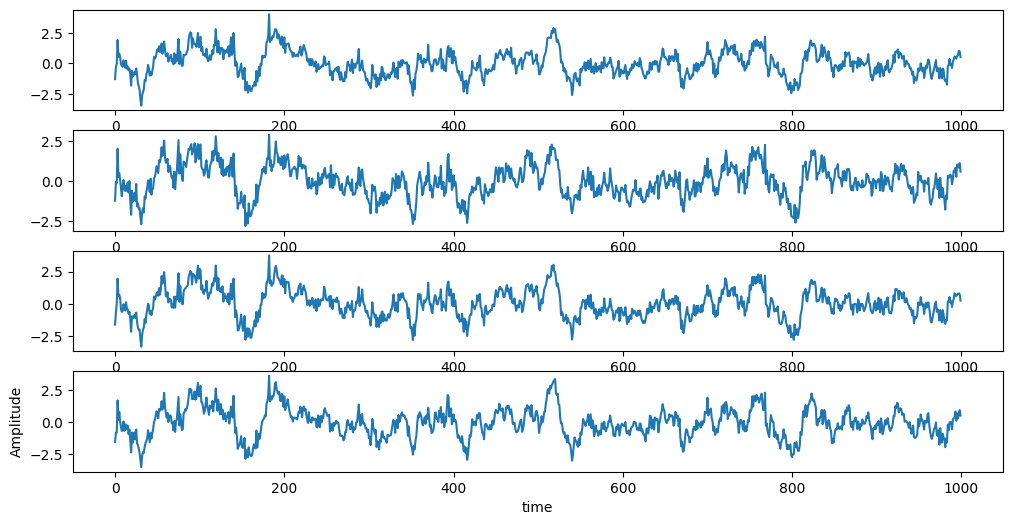

In [ ]:
x=data[0]
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(x[0])
plt.subplot(412)
plt.plot(x[1])
plt.subplot(413)
plt.plot(x[2])
plt.subplot(414)
plt.plot(x[3])
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
data = np.load('Preprocessed_data/CAR/train_x_with_CAR.npy')
labels = np.load('Preprocessed_data/CAR/train_y_with_CAR.npy')
data_test = np.load('Preprocessed_data/CAR/test_x_with_CAR.npy')
labels_test = np.load('Preprocessed_data/CAR/test_y_with_CAR.npy')

# Feature Extraction

In [ ]:
data.shape

(288, 22, 1000)

In [ ]:
data.shape,data_test.shape,labels.shape,labels_test.shape

((288, 22, 1000), (288, 22, 1000), (288,), (288,))

In [ ]:
data=np.concatenate((data,data_test))
labels=np.concatenate((labels,labels_test))

In [ ]:
data.shape,labels.shape

((576, 22, 1000), (576,))

# Wavelet

In [ ]:
#(576,22,1000)
for i in range(data.shape[0]):
    feat=[]
    for j in range(data.shape[1]):
        detail_energy=[]
        temp_coeff=pywt.wavedec(data[i][j],'db1',level=2)
        # print(len(temp_coeff))
        approximation_coefficients = temp_coeff[0]
        detail_coefficients = temp_coeff[1]
        

        s = pywt.idwt(approximation_coefficients, detail_coefficients, 'db1', 'smooth')


        s = butter_bandpass_filter(
            signal  = s,
            lowcut  = 8,
            highcut = 30,
            fs      = 125,
            order   = 6
        )
        #print(len(detail_coefficients[0]),len(detail_coefficients[1]))
        # detail_energy.append(np.sum(np.square(detail_coefficients[0]))) 
        # detail_energy.append(np.sum(np.square(detail_coefficients[1])))
        # tmp_feat_1=np.append(detail_energy[0],detail_energy[1])
        feat.append(s)
    #print(np.expand_dims(feat, axis=0).shape)
    if i==0:
        final_feat=np.expand_dims(feat, axis=0)
    else:
        final_feat=np.concatenate((final_feat,np.expand_dims(feat, axis=0)),axis=0)

In [ ]:
final_feat.shape

(576, 22, 500)

In [ ]:
# final_feat=final_feat.reshape(final_feat.shape[0], -1)
# final_feat.shape

# CSP

In [ ]:
csp = CSP(n_components=4)
final_feat= csp.fit_transform(final_feat,labels)
# data_test_csp  = csp.transform(data_test)

Computing rank from data with rank=None
    Using tolerance 4.4 (2.2e-16 eps * 22 dim * 9.1e+14  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.6 (2.2e-16 eps * 22 dim * 9.3e+14  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.6 (2.2e-16 eps * 22 dim * 9.5e+14  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9 (2.2e-16 eps * 22 dim * 1e+15  max singular value)
    Estimated rank

In [ ]:
pd.DataFrame(final_feat)


,0,1,2,3
0,-1.223422,-0.779022,-0.312101,-0.663143
1,-1.018512,0.072370,-0.570933,-0.429878
2,-1.527526,0.237482,-0.848306,-0.421013
3,1.260642,-0.944225,0.444328,-0.020942
4,-1.285978,-0.209725,-0.779015,-0.190887
...,...,...,...,...
571,0.116985,0.645226,0.306943,0.189846
572,0.193633,0.410964,-0.030110,0.599840
573,1.070980,0.796684,0.790156,-0.100003
574,-0.009951,-0.650888,0.194070,0.520537


# Split data

In [ ]:
x_train,x_test ,y_train,y_test = train_test_split(final_feat,labels,test_size = 0.25 , random_state =42 , shuffle = True,stratify = labels )
x_train.shape,x_test.shape ,y_train.shape,y_test.shape

((432, 4), (144, 4), (432,), (144,))

# Classifiers

In [ ]:
randomforest =RandomForestClassifier().fit(x_train,y_train)
y_te_random = randomforest.predict(x_test)

clf = svm.SVC(decision_function_shape='ovo').fit(x_train, y_train)
y_svm = clf.predict(x_test)

knn = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)
knn_pred = knn.predict(x_test)

lm = LogisticRegression(multi_class='ovr', solver='liblinear').fit(x_train, y_train)
lm_pred = lm.predict(x_test)

print("Random Forst =",accuracy_score(y_te_random,y_test)*100)
print("SVM =",accuracy_score(y_svm,y_test)*100)
print("KNN =",accuracy_score(knn_pred,y_test)*100)
print("Logistic Regression =",accuracy_score(lm_pred,y_test)*100)

Random Forst = 81.25
SVM = 85.41666666666666
KNN = 81.25
Logistic Regression = 84.72222222222221


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
clf_rbf = svm.SVC(kernel='rbf',gamma=0.5,C=0.1).fit(x_train, y_train)
svm_rbf = clf_rbf.predict(x_test)
print("SVM_rbf =",accuracy_score(svm_rbf,y_test)*100)
clf_poly = svm.SVC(kernel='poly',degree=3,C=1).fit(x_train, y_train)
svm_poly = clf_poly.predict(x_test)
print("SVM_poly =",accuracy_score(svm_poly,y_test)*100)

SVM_rbf = 81.94444444444444
SVM_poly = 79.16666666666666


In [ ]:
print(classification_report(y_test,lm_pred))
print(classification_report(y_test,y_te_random))


              precision    recall  f1-score   support

           1       0.82      0.86      0.84        36
           2       0.93      0.78      0.85        36
           3       0.66      0.75      0.70        36
           4       0.69      0.67      0.68        36

    accuracy                           0.76       144
   macro avg       0.77      0.76      0.77       144
weighted avg       0.77      0.76      0.77       144

              precision    recall  f1-score   support

           1       0.64      0.64      0.64        36
           2       0.68      0.75      0.71        36
           3       0.52      0.42      0.46        36
           4       0.46      0.50      0.48        36

    accuracy                           0.58       144
   macro avg       0.57      0.58      0.57       144
weighted avg       0.57      0.58      0.57       144



# Save model & data

In [ ]:
import joblib

# save model
#joblib.dump(lm, "models/my_logistic_regression.joblib")

In [ ]:

# load model
loaded_rf = joblib.load("models/my_logistic_regression.joblib")
guiData=np.load("gui_data/CAR/guiData.npy")

y_val_random = loaded_rf.predict(guiData)
#print("Logistic Regression =",accuracy_score(y_val_random,y_test)*100)


In [ ]:
y_test[-10:]

array([1, 1, 3, 3, 2, 2, 3, 4, 1, 4])

In [ ]:
guiData=x_test[-10:]
np.save("gui_data/CAR/guiData",guiData)

NameError: name 'x_test' is not defined

# GUI

In [ ]:
import tkinter as tk

In [ ]:
# load model & data (contain 10 signals)
arrows = {3:"foot", 4:"tongue", 1:"left hand", 2:"right hand"}
loaded_rf = joblib.load("models/my_logistic_regression.joblib")
guiData=np.load("gui_data/CAR/guiData.npy")


In [ ]:

my_window=tk.Tk()
count=0

# make prediction and draw arrow based on predicion
def make_prediction(event):
    global count
    y_val_random = np.array(loaded_rf.predict(guiData)).tolist()
    draw_arrow(arrows[y_val_random[count]])
    count+=1
    
# drow arrows (up, down, left, right)
def draw_arrow(prediction):
    print(prediction)
    if prediction == "tongue":
        my_canvas.create_line(250,100,250,200,fill='black',width=5,arrow='first') # up
    elif prediction == "foot":
        my_canvas.create_line(250,300,250,400,fill='black',width=5,arrow='last') # down
    elif prediction == "left hand":
        my_canvas.create_line(100,250,200,250,fill='black',width=5,arrow='first') # left
    elif prediction == "right hand":
        my_canvas.create_line(300,250,400,250,fill='black',width=5,arrow='last') # right

# delete arrow from screen window
def delete_arrow(event):
    my_canvas.delete('all')
    
# set the size of screen window
my_canvas=tk.Canvas(my_window,width=500,height=500,background='white')

# call make_prediction function when clicking the left button on mouse
my_canvas.bind('<Button-1>',make_prediction)

# call delete_arrow function when clicking the right button on mouse
my_canvas.bind('<Button-3>',delete_arrow)
my_canvas.grid(row=0,column=0)
my_window.mainloop()

left hand
left hand
foot
foot
right hand
right hand
foot
foot
left hand
tongue
